<a href="https://colab.research.google.com/github/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/blob/main/MSC_Final_project_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## MSC Data Science Final Project on Chronic Kidney Disease by Abbugari Dhanalakshmi Shilpa
#Chronic Kidney Disease Prediction Overview
#This project is focused on predicting chronic kidney disease (CKD) by analyzing essential medical parameters,
#including Specific Gravity, Hypertension, Hemoglobin, Diabetes Mellitus, Albumin, Appetite, Red Blood Cell Count, Pus Cell, and more.
#By utilizing advanced machine learning models, the system delivers precise predictions to support healthcare professionals
#in early diagnosis and informed decision-making, ultimately enhancing patient outcomes.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# To Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()

In [6]:
# Loading the dataset
file_path = 'https://raw.githubusercontent.com/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/refs/heads/main/kidney_disease.csv'
CKD_Data = pd.read_csv(file_path)

# Displaying the first few rows of the CKD_Data dataset
CKD_Data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
# Define the standard column names in the same order as they appear in the CKD_Data DataFrame
CKD_Data.columns = [
    'ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
    'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count',
    'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
    'Appetite', 'Pedal Edema', 'Anemia', 'Classification'
]

# Displaying the updated CKD_Data DataFrame with new column names
print("Updated DataFrame with new column names:")
CKD_Data.head()

Updated DataFrame with new column names:


,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# overall information of the CKD dataset
CKD_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

In [9]:
# View the missing values in CKD_Data

print("\nMissing values in CKD Dataset: ")
print(CKD_Data.isnull().sum())


Missing values in CKD Dataset: 
ID                           0
Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Sugar                       49
Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed Cell Volume          70
White Blood Cell Count     105
Red Blood Cell Count       130
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64


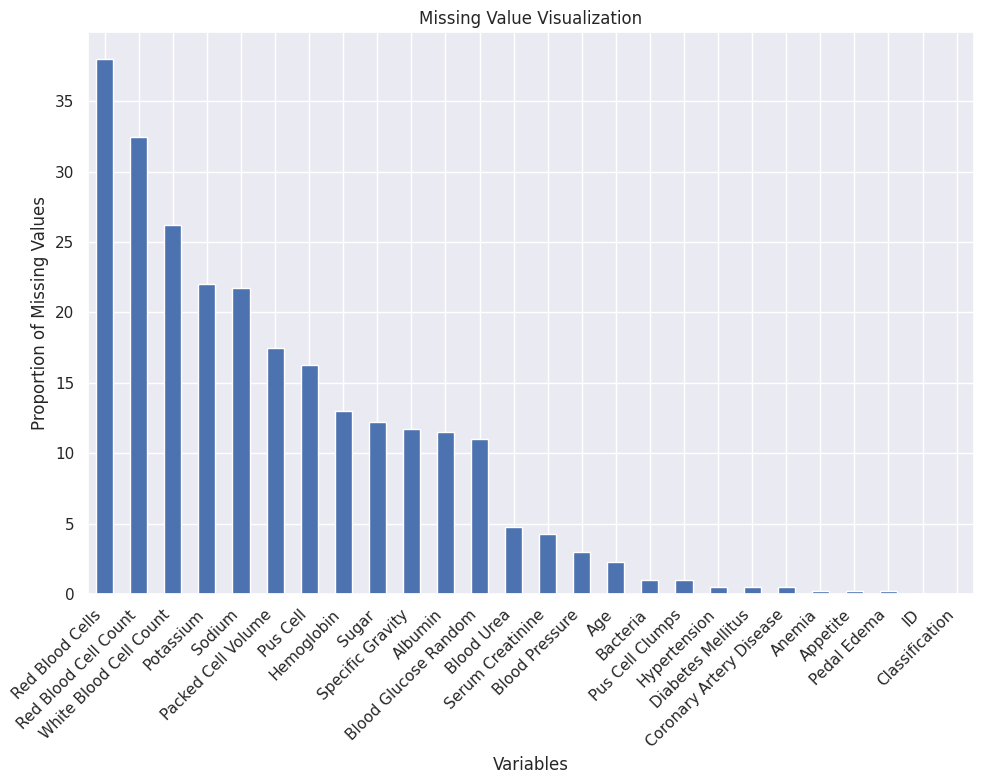

In [10]:
# Visualize missing values
# Count of number of missing values in each column
missing_values = (CKD_Data.isna().sum()/CKD_Data.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Missing Value Visualization')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# description of the CKD  dataset
CKD_Data.describe()

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
# Replacing non-standard values in multiple columns

# Replacing non-standard values in 'Classification' column
CKD_Data['Classification'] = CKD_Data['Classification'].str.replace('ckd\t', 'ckd', regex=False)

# Verifing  unique values in the 'Classification' column after replacement
print("Unique values in 'Classification' after replacement:")
print(CKD_Data['Classification'].unique())

# Replacing non-standard values in 'Diabetes Mellitus' and 'Coronary Artery Disease' columns
CKD_Data['Diabetes Mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
CKD_Data['Coronary Artery Disease'].replace(to_replace={'\tno': 'no'}, inplace=True)

# Verifying  unique values in each column
print("Unique values in 'Diabetes Mellitus' after replacement:")
print(CKD_Data['Diabetes Mellitus'].unique())

print("Unique values in 'Coronary Artery Disease' after replacement:")
print(CKD_Data['Coronary Artery Disease'].unique())

Unique values in 'Classification' after replacement:
['ckd' 'notckd']
Unique values in 'Diabetes Mellitus' after replacement:
['yes' 'no' nan]
Unique values in 'Coronary Artery Disease' after replacement:
['no' 'yes' nan]


In [14]:
# Classifying columns : categorical columns and numerical columns
cat_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype=='object']
num_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype!='object']

In [15]:
cat_cols

['Red Blood Cells',
 'Pus Cell',
 'Pus Cell Clumps',
 'Bacteria',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Classification']

In [16]:
num_cols

['ID',
 'Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin']

In [19]:
CKD_Data.groupby('Classification').count()

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
Classification,,,,,,,,,,,,,,,,,,,,,
ckd,250,242,240,208,209,206,107,194,250,250,...,204,184,152,127,250,250,250,250,250,250
notckd,150,149,148,145,145,145,141,141,146,146,...,144,146,143,143,148,148,148,149,149,149


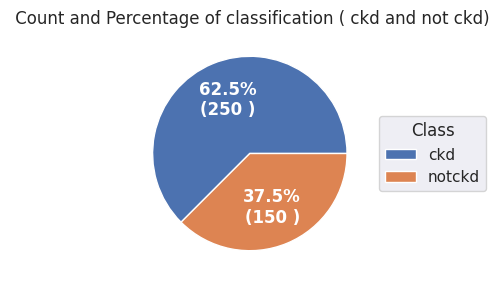

In [25]:
# Create a data frame of class counts
CKD_Data_Classification_counts = CKD_Data['Classification'].value_counts().sort_index()
#print(CKD_Data_Classification_counts)

# Creating  pie chart
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(aspect="equal"))


# Prepare data
types = [x   for x in (CKD_Data_Classification_counts.index.values) ]
values = [x   for x in (CKD_Data_Classification_counts.values) ]

# Lambda function
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

# ax.pie
wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),textprops=dict(color="w"))

ax.legend(wedges, types,
          title="Class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title(" Count and Percentage of classification ( ckd and not ckd)")

plt.setp(autotexts, size=12, weight="bold")

plt.show()

